# Tema 2 · Estadística descriptiva básica

**Sección:** Medidas de tendencia central y de dispersión

Este notebook carga la base *instructor* y calcula media, mediana, moda, varianza y desviación estándar; además incluye visualizaciones de apoyo.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Ruta al archivo dentro de tu Drive
ruta = '/content/drive/MyDrive/Analisis de datos - Talento Tech/Misión 2/tema2_base_estudiantes.csv'

# Cargar el CSV en un DataFrame
df = pd.read_csv(ruta)

# Ver las primeras filas
df.head(59)

,id,edad,ingresos,gasto_mensual,score,categoria
0,110,31.0,1407000,801000,66.1,C
1,150,34.0,354000,0,81.0,B
2,194,22.0,634000,491000,60.7,A
3,653,30.0,596000,201000,75.8,B
4,470,27.0,675000,484000,75.9,A
5,939,34.0,$930.000,427000,73.5,A
6,35,39.0,$424.000,0,67.6,A
7,511,34.0,305000,147000,62.4,B
8,211,37.0,290000,192000,37.5,A
9,726,31.0,930000,83000,82.9,B


## 1. Exploración inicial

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1020 non-null   int64  
 1   edad           1010 non-null   float64
 2   ingresos       1020 non-null   object 
 3   gasto_mensual  995 non-null    object 
 4   score          1020 non-null   float64
 5   categoria      1020 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 47.9+ KB


In [19]:
df.describe(include='all')

,id,edad,ingresos,gasto_mensual,score,categoria
count,1020.000000,1010.000000,1020,995,1020.000000,1020
unique,NaN,NaN,682,501,NaN,11
top,NaN,NaN,483000,0,NaN,B
freq,NaN,NaN,6,77,NaN,445
mean,500.081373,32.290099,NaN,NaN,73.918137,NaN
std,288.836576,7.686628,NaN,NaN,32.651856,NaN
min,1.000000,18.000000,NaN,NaN,31.900000,NaN
25%,249.750000,27.000000,NaN,NaN,61.875000,NaN
50%,498.500000,32.000000,NaN,NaN,70.000000,NaN
75%,751.250000,37.000000,NaN,NaN,78.000000,NaN


## 2. Medidas de tendencia central

In [20]:
numericas = ['edad', 'ingresos', 'gasto_mensual', 'score']

medias = df[numericas].mean(numeric_only=True)
medianas = df[numericas].median(numeric_only=True)
modas = df[numericas].mode().iloc[0]

print('Media:\n', medias, '\n')
print('Mediana:\n', medianas, '\n')
print('Moda:\n', modas)

Media:
 edad     32.290099
score    73.918137
dtype: float64 

Mediana:
 edad     32.0
score    70.0
dtype: float64 

Moda:
 edad               28.0
ingresos         371000
gasto_mensual         0
score              72.5
Name: 0, dtype: object


## 3. Medidas de dispersión

In [21]:
varianzas = df[numericas].var(ddof=1, numeric_only=True)
desv = df[numericas].std(ddof=1, numeric_only=True)

print('Varianza:\n', varianzas, '\n')
print('Desviación estándar:\n', desv)

Varianza:
 edad       59.084243
score    1066.143724
dtype: float64 

Desviación estándar:
 edad      7.686628
score    32.651856
dtype: float64


## 4. Visualizaciones rápidas

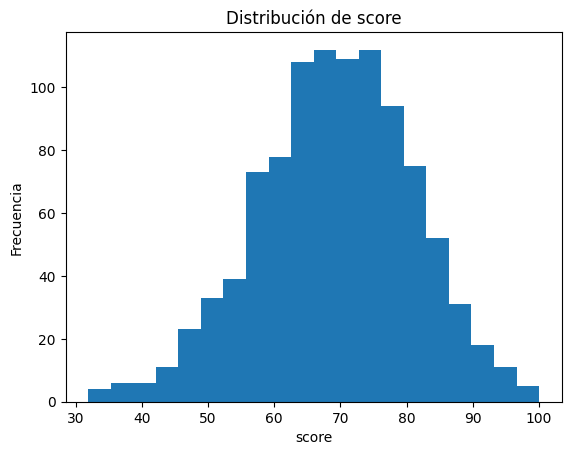

In [8]:
# Histograma de score
plt.figure()
plt.hist(df['score'], bins=20)
plt.title('Distribución de score')
plt.xlabel('score')
plt.ylabel('Frecuencia')
plt.show()

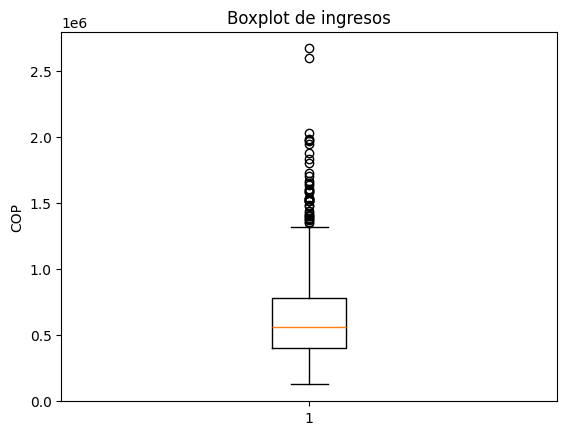

In [9]:
# Boxplot de ingresos
plt.figure()
plt.boxplot(df['ingresos'])
plt.title('Boxplot de ingresos')
plt.ylabel('COP')
plt.show()

## 5. Estadísticos por categoría

In [10]:
df.groupby('categoria')[numericas].agg(['count','mean','median','std'])

edad                             ingresos                           \
          count       mean median       std    count           mean    median   
categoria                                                                       
A           307  32.596091   33.0  7.417502      307  610228.013029  531000.0   
B           440  32.125000   32.0  7.856649      440  643886.363636  565000.0   
C           253  32.051383   32.0  7.562001      253  642901.185771  566000.0   

                         gasto_mensual                           \
                     std         count           mean    median   
categoria                                                         
A          334779.392971           307  238651.465798  210000.0   
B          327783.897080           440  264359.090909  242000.0   
C          336029.763714           253  270411.067194  245000.0   

                         score                               
                     std count       mean median        std  
categoria                                                    
A          185417.826230   307  69.627036   70.4  12.325677  
B          186195.572003   440  68.987045   68.9  11.292289  
C          186494.725754   253  69.053360   69.4  12.059507